In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv
/kaggle/input/epileptic-seizures-dataset/data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
data=pd.read_csv("../input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv")

In [4]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
data.shape

(11500, 180)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [7]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [8]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [9]:
data['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='y', ylabel='count'>

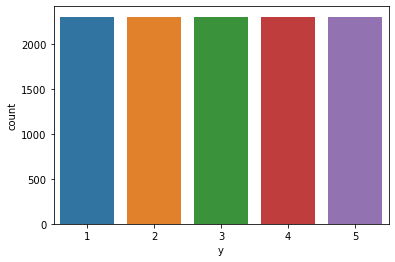

In [10]:
sns.countplot(data['y'])

<AxesSubplot:>

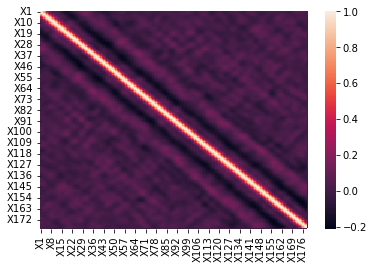

In [11]:
sns.heatmap(data.corr())

In [12]:
data.drop(['Unnamed'],axis=1,inplace=True)

In [13]:
d=pd.DataFrame(data.iloc[:,0:-1])

In [14]:
d.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [15]:
from sklearn.preprocessing  import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
scaled_data=scaler.fit_transform(d)

In [18]:
X=scaled_data
y=data['y']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)
pred=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[572   2   9  11   0]
 [ 31 296 165  15  59]
 [  7 159 322  24  75]
 [  1   9  13 435 134]
 [  0  32  54  75 375]]
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.96      0.95       594
           2       0.59      0.52      0.56       566
           3       0.57      0.55      0.56       587
           4       0.78      0.73      0.76       592
           5       0.58      0.70      0.64       536

    accuracy                           0.70      2875
   macro avg       0.69      0.69      0.69      2875
weighted avg       0.70      0.70      0.69      2875



In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import imblearn
import seaborn as sns
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [21]:
data.shape

(11500, 179)

In [22]:
data['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

<AxesSubplot:>

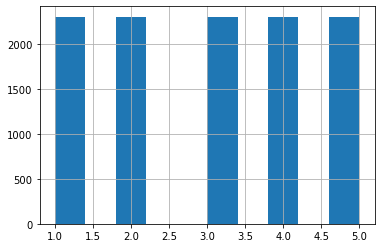

In [23]:
data.y.hist()

In [24]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)
print(data['y'].value_counts())

data.head()

0    9200
1    2300
Name: y, dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,5,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,283,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,-82,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,-74,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,-47,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [25]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,...,-7.629391,-7.373565,-7.439913,-7.592348,-6.897652,-6.000348,-5.423913,-5.151043,-5.586870,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,161.197812,158.045513,157.490904,160.163082,163.996955,167.74431,171.232021,171.484787,169.299229,166.255922,...,158.301750,157.214361,158.679911,160.183325,162.002986,164.260512,166.182755,167.154785,167.414376,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [27]:
X = data.drop('y', axis=1)
y = data['y']
df = pd.DataFrame(normalize(X))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,0.104109,0.146523,0.176599,0.171972,0.148066,0.096397,0.042415,-0.006941,-0.025449,-0.029305,-0.007712,0.026991,0.049355,0.087143,0.117219,0.126473,0.097939,0.038559,-0.036245,-0.093312,-0.106422,-0.096397,-0.077889,-0.038559,0.008483,0.030076,0.018508,0.037016,0.049355,0.035474,0.010025,-0.014652,-0.047042,-0.074033,-0.100253,-0.101795,-0.089456,-0.088685,-0.054754,-0.010796,0.019279,0.014652,0.004627,0.006941,0.016195,0.010025,-0.028534,-0.044728,-0.025449,0.003856,...,-0.033161,-0.017737,0.006169,0.032389,0.059381,0.079431,0.104109,0.093312,0.060923,0.045499,0.033161,0.041644,0.069406,0.085601,0.082516,0.049355,0.024678,0.013881,-0.019279,-0.053211,-0.050126,-0.033932,-0.025449,-0.043957,-0.067864,-0.087914,-0.100253,-0.087914,-0.064008,-0.040872,-0.060923,-0.055525,-0.065550,-0.084058,-0.075575,-0.055525,-0.050126,-0.048584,-0.008483,0.007712,0.006169,-0.013110,-0.011568,-0.023906,-0.059381,-0.079431,-0.097939,-0.089456,-0.064008,-0.039330
1,0.061209,0.060575,0.056452,0.052488,0.050743,0.049951,0.048682,0.043132,0.038692,0.036789,0.037582,0.040912,0.033618,0.000317,-0.042339,-0.095937,-0.134787,-0.158732,-0.175858,-0.172845,-0.153340,-0.118296,-0.073578,-0.024103,0.018712,0.050426,0.067711,0.075005,0.076908,0.070882,0.062954,0.053756,0.049475,0.049792,0.051695,0.053122,0.052646,0.051378,0.049158,0.049475,0.048999,0.048999,0.048048,0.047096,0.046779,0.046779,0.046462,0.045352,0.044242,0.044876,...,-0.272111,-0.215659,-0.104975,-0.015223,0.038533,0.051219,0.038216,0.004599,-0.026482,-0.036155,-0.021566,0.004281,0.023152,0.036313,0.042656,0.047096,0.048682,0.048048,0.048365,0.048523,0.048682,0.044400,0.036630,0.025213,0.013479,0.008087,0.006819,0.009832,0.009990,0.009990,0.010942,0.014113,0.019504,0.021566,0.020139,0.016174,0.015064,0.016650,0.020773,0.025847,0.026640,0.026006,0.023786,0.023152,0.024103,0.024896,0.024737,0.024420,0.022676,0.020456
2,-0.038444,-0.046854,-0.056465,-0.044451,-0.038444,-0.043250,-0.068479,-0.087701,-0.102118,-0.112930,-0.118937,-0.112930,-0.115333,-0.124944,-0.123742,-0.110527,-0.090104,-0.082895,-0.082895,-0.063673,-0.044451,-0.016819,-0.012014,-0.046854,-0.093708,-0.122541,-0.117736,-0.096111,-0.064875,-0.048055,-0.042048,-0.046854,-0.038444,-0.015618,0.008410,0.040847,0.049257,0.039646,0.007208,-0.018021,-0.036042,-0.056465,-0.063673,-0.078090,-0.076889,-0.081694,-0.102118,-0.117736,-0.130951,-0.098513,...,-0.104520,-0.072083,-0.044451,-0.031236,-0.018021,-0.007208,-0.016819,-0.027632,-0.040847,-0.049257,-0.064875,-0.098513,-0.128548,-0.151374,-0.148972,-0.129749,-0.100916,-0.081694,-0.073284,-0.067277,-0.075687,-0.074486,-0.039646,0.001201,0.033639,0.054062,0.044451,0.057666,0.074486,0.096111,0.079291,0.027632,-0.013215,-0.046854,-0.052861,-0.050458,-0.054062,-0.057666,-0.050458,-0.007208,0.034840,0.068479,0.076889,0.057666,0.022826,-0.014417,-0.036042,-0.042048,-0.042048,-0.043250
3,-0.111276,-0.107037,-0.101738,-0.097499,-0.094319,-0.100678,-0.108096,-0.105977,-0.092200,-0.083722,-0.076303,-0.072064,-0.078423,-0.084781,-0.087961,-0.077363,-0.072064,-0.064646,-0.061467,-0.062526,-0.067825,-0.083722,-0.089021,-0.102798,-0.099618,-0.089021,-0.081602,-0.079483,-0.076303,-0.072064,-0.080542,-0.080542,-0.076303,-0.071004,-0.073124,-0.073124,-0.073124,-0.071004,-0.072064,-0.073124,-0.071004,-0.069945,-0.061467,-0.057227,-0.059347,-0.074184,-0.084781,-0.086901,-0.090080,-0.078423,...,-0.076303,-0.064646,-0.069945,-0.076303,-0.093260,-0.095379,-0.093260,-0.081602,-0.061467,-0.056168,-0.064646,-0.073124,-0.069945,-0.078423,-0.073124,-0.064646,-0.054048,-0.047690,-0.047690,-0.051929,-0.061467,-0.067825,-0.082662,-0.084781,-0.095379,-0.092200,-0.087961,-0.082662

In [28]:
# Initialize the counters for detected and managed outliers
detected_outliers = 0
managed_outliers = 0

# Loop through each of the 178 explanatory variables and calculate the IQR and bounds
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify any data points that fall outside the bounds and either remove or adjust them
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    if outliers.any():
        detected_outliers += outliers.sum()

        
        df.loc[outliers, col] = np.nanmedian(df[col])
        managed_outliers += outliers.sum()

print(f"Detected {detected_outliers} outliers and managed {managed_outliers} outliers.")

Detected 8269 outliers and managed 8269 outliers.


In [29]:
df['y'] = y

print('Normalized Totall Mean VALUE for Epiletic: {}'.format((df[df['y'] == 1].describe().mean()).mean()))
print('Normalized Totall Std VALUE for Epiletic: {}'.format((df[df['y'] == 1].describe().std()).std()))
print('Normalized Totall Mean VALUE for NOT Epiletic: {}'.format((df[df['y'] == 0].describe().mean()).mean()))
print('Normalized Totall Std VALUE for NOT Epiletic: {}'.format((df[df['y'] == 0].describe().std()).std()))

Normalized Totall Mean VALUE for Epiletic: 287.5097360814575
Normalized Totall Std VALUE for Epiletic: 0.0224843748055516
Normalized Totall Mean VALUE for NOT Epiletic: 1150.0021298752129
Normalized Totall Std VALUE for NOT Epiletic: 0.0006105494417603806


In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,y
0,0.104109,0.146523,0.176599,0.171972,0.148066,0.096397,0.042415,-0.006941,-0.025449,-0.029305,-0.007712,0.026991,0.049355,0.087143,0.117219,0.126473,0.097939,0.038559,-0.036245,-0.093312,-0.106422,-0.096397,-0.077889,-0.038559,0.008483,0.030076,0.018508,0.037016,0.049355,0.035474,0.010025,-0.014652,-0.047042,-0.074033,-0.100253,-0.101795,-0.089456,-0.088685,-0.054754,-0.010796,0.019279,0.014652,0.004627,0.006941,0.016195,0.010025,-0.028534,-0.044728,-0.025449,0.003856,...,-0.017737,0.006169,0.032389,0.059381,0.079431,0.104109,0.093312,0.060923,0.045499,0.033161,0.041644,0.069406,0.085601,0.082516,0.049355,0.024678,0.013881,-0.019279,-0.053211,-0.050126,-0.033932,-0.025449,-0.043957,-0.067864,-0.087914,-0.100253,-0.087914,-0.064008,-0.040872,-0.060923,-0.055525,-0.065550,-0.084058,-0.075575,-0.055525,-0.050126,-0.048584,-0.008483,0.007712,0.006169,-0.013110,-0.011568,-0.023906,-0.059381,-0.079431,-0.097939,-0.089456,-0.064008,-0.039330,0
1,0.061209,0.060575,0.056452,0.052488,0.050743,0.049951,0.048682,0.043132,0.038692,0.036789,0.037582,0.040912,0.033618,0.000317,-0.042339,-0.095937,-0.134787,-0.158732,-0.175858,-0.172845,-0.153340,-0.118296,-0.073578,-0.024103,0.018712,0.050426,0.067711,0.075005,0.076908,0.070882,0.062954,0.053756,0.049475,0.049792,0.051695,0.053122,0.052646,0.051378,0.049158,0.049475,0.048999,0.048999,0.048048,0.047096,0.046779,0.046779,0.046462,0.045352,0.044242,0.044876,...,-0.215659,-0.104975,-0.015223,0.038533,0.051219,0.038216,0.004599,-0.026482,-0.036155,-0.021566,0.004281,0.023152,0.036313,0.042656,0.047096,0.048682,0.048048,0.048365,0.048523,0.048682,0.044400,0.036630,0.025213,0.013479,0.008087,0.006819,0.009832,0.009990,0.009990,0.010942,0.014113,0.019504,0.021566,0.020139,0.016174,0.015064,0.016650,0.020773,0.025847,0.026640,0.026006,0.023786,0.023152,0.024103,0.024896,0.024737,0.024420,0.022676,0.020456,1
2,-0.038444,-0.046854,-0.056465,-0.044451,-0.038444,-0.043250,-0.068479,-0.087701,-0.102118,-0.112930,-0.118937,-0.112930,-0.115333,-0.124944,-0.123742,-0.110527,-0.090104,-0.082895,-0.082895,-0.063673,-0.044451,-0.016819,-0.012014,-0.046854,-0.093708,-0.122541,-0.117736,-0.096111,-0.064875,-0.048055,-0.042048,-0.046854,-0.038444,-0.015618,0.008410,0.040847,0.049257,0.039646,0.007208,-0.018021,-0.036042,-0.056465,-0.063673,-0.078090,-0.076889,-0.081694,-0.102118,-0.117736,-0.130951,-0.098513,...,-0.072083,-0.044451,-0.031236,-0.018021,-0.007208,-0.016819,-0.027632,-0.040847,-0.049257,-0.064875,-0.098513,-0.128548,-0.151374,-0.148972,-0.129749,-0.100916,-0.081694,-0.073284,-0.067277,-0.075687,-0.074486,-0.039646,0.001201,0.033639,0.054062,0.044451,0.057666,0.074486,0.096111,0.079291,0.027632,-0.013215,-0.046854,-0.052861,-0.050458,-0.054062,-0.057666,-0.050458,-0.007208,0.034840,0.068479,0.076889,0.057666,0.022826,-0.014417,-0.036042,-0.042048,-0.042048,-0.043250,0
3,-0.111276,-0.107037,-0.101738,-0.097499,-0.094319,-0.100678,-0.108096,-0.105977,-0.092200,-0.083722,-0.076303,-0.072064,-0.078423,-0.084781,-0.087961,-0.077363,-0.072064,-0.064646,-0.061467,-0.062526,-0.067825,-0.083722,-0.089021,-0.102798,-0.099618,-0.089021,-0.081602,-0.079483,-0.076303,-0.072064,-0.080542,-0.080542,-0.076303,-0.071004,-0.073124,-0.073124,-0.073124,-0.071004,-0.072064,-0.073124,-0.071004,-0.069945,-0.061467,-0.057227,-0.059347,-0.074184,-0.084781,-0.086901,-0.090080,-0.078423,...,-0.064646,-0.069945,-0.076303,-0.093260,-0.095379,-0.093260,-0.081602,-0.061467,-0.056168,-0.064646,-0.073124,-0.069945,-0.078423,-0.073124,-0.064646,-0.054048,-0.047690,-0.047690,-0.051929,-0.061467,-0.067825,-0.082662,-0.084781,-0.095379,-0.092200,-0.087961,-0.082662,-0.067825,-0.040271,-0.023315,-0.03

In [31]:
df.shape

(11500, 179)

In [32]:
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

In [33]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,0.040119,0.035647,0.009950,-0.027824,-0.067519,-0.103498,-0.129956,-0.140550,-0.136456,-0.116471,-0.089462,-0.059348,-0.032130,-0.003778,0.022393,0.045038,0.065780,0.085341,0.106417,0.122688,0.129460,0.121796,0.101925,0.076640,0.050850,0.025857,0.003230,-0.015046,-0.030440,-0.046574,-0.062712,-0.075312,-0.080657,-0.081316,-0.076653,-0.065909,-0.053789,-0.038625,-0.027788,-0.019087,...,0.027092,0.028225,0.027391,0.017235,-0.003226,-0.019992,-0.026588,-0.014417,0.009000,0.028023,0.038523,0.043202,0.042494,0.037142,0.024661,0.008851,-0.003354,-0.013648,-0.018830,-0.020322,-0.017294,-0.012058,-0.000565,0.006657,0.009527,0.008568,0.008700,0.009040,0.008410,0.005102,0.006229,0.011509,0.015700,0.017597,0.009821,0.001099,-0.008779,-0.013999,-0.009253,0.006206,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022,-0.031262
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,0.042230,0.038162,0.019416,-0.007544,-0.037875,-0.068782,-0.098616,-0.121110,-0.133449,-0.129880,-0.115972,-0.092897,-0.066815,-0.035261,-0.002148,0.028793,0.058568,0.087011,0.114048,0.134293,0.140905,0.130957,0.106961,0.078605,0.050587,0.025282,0.006215,-0.003770,-0.008887,-0.016415,-0.029445,-0.045751,-0.061393,-0.073848,-0.079980,-0.072622,-0.057410,-0.037203,-0.021370,-0.009857,...,0.020532,0.028189,0.034199,0.028902,0.009855,-0.008995,-0.021304,-0.016790,-0.000922,0.014146,0.027516,0.038254,0.045389,0.044892,0.032183,0.012644,-0.006506,-0.022992,-0.031000,-0.030409,-0.022812,-0.010965,0.004039,0.011242,0.009383,0.002718,-0.001754,-0.001144,0.003471,0.007744,0.014644,0.024538,0.031304,0.031087,0.019802,0.008815,-0.002849,-0.008964,-0.008387,-0.001270,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059,-0.024503
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,0.054331,0.041668,0.026530,0.011323,-0.008082,-0.033320,-0.065669,-0.100113,-0.128104,-0.140955,-0.140121,-0.125213,-0.102256,-0.070201,-0.034079,0.001818,0.036775,0.069815,0.099279,0.122287,0.131530,0.124478,0.103131,0.077742,0.051992,0.027667,0.010777,0.006505,0.008480,0.009787,0.002345,-0.013898,-0.036938,-0.058947,-0.073775,-0.069031,-0.052271,-0.030106,-0.012713,-0.001597,...,0.008403,0.020345,0.033389,0.036488,0.025256,0.010689,-0.004438,-0.008605,-0.004340,0.002666,0.014852,0.028084,0.040009,0.042611,0.031392,0.012523,-0.007432,-0.024011,-0.031126,-0.027958,-0.018978,-0.006283,0.007655,0.011787,0.005419,-0.005595,-0.011756,-0.007375,0.005107,0.019473,0.031805,0.041972,0.046523,0.041307,0.027028,0.013457,0.001705,-0.002471,-0.003512,-0.002198,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419,-0.015615
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,0.088767,0.056826,0.035834,0.025675,0.013586,-0.006570,-0.038564,-0.078758,-0.115846,-0.140112,-0.150236,-0.144151,-0.127593,-0.099149,-0.063818,-0.026676,0.008765,0.041272,0.068918,0.093305,0.107510,0.108765,0.095508,0.077188,0.056519,0.034770,0.018064,0.014698,0.018932,0.027120,0.026851,0.015679,-0.008713,-0.036238,-0.057237,-0.057592,-0.044866,-0.026222,-0.009730,0.001355,...,-0.005433,0.008069,0.025821,0.037231,0.035920,0.027965,0.013522,0.002024,-0.005616,-0.008427,-0.000594,0.011902,0.025951,0.030833,0.022547,0.008138,-0.006137,-0.015789,-0.017481,-0.011878,-0.004617,0.002981,0.010816,0.010145,0.001175,-0.010911,

In [34]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 18400 VS Epilepttic 18400


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(14720, 178), (3680, 178), (14720,), (3680,)]

In [36]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          KNeighborsClassifier()
         ]

In [37]:
#Check the correctness of list of classifiers and also 
model_name = [type(model).__name__ for model in models]
print(model_name)

['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']


In [38]:
def classifiers(models):
    columns = ['Score', 'Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model
        print('Initialized classifier {} with default parameters \n'.format(type(model).__name__))    
        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        predictions = clf.predict(X_test)
        # Use score method to get accuracy of model
        score = clf.score(X_test, y_test)
        print('Score of classifier {} is: {} \n'.format(type(model).__name__, score))
        df_result['Score']['{}'.format(type(model).__name__)] = str(round(score * 100, 2)) + '%' 
        df_result['Predictions']['{}'.format(type(model).__name__)] = predictions
    return df_result

In [39]:
classifiers(models)

Initialized classifier LogisticRegression with default parameters 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Score of classifier LogisticRegression is: 0.5706521739130435 

Initialized classifier DecisionTreeClassifier with default parameters 

Score of classifier DecisionTreeClassifier is: 0.9722826086956522 

Initialized classifier RandomForestClassifier with default parameters 

Score of classifier RandomForestClassifier is: 0.9888586956521739 

Initialized classifier KNeighborsClassifier with default parameters 

Score of classifier KNeighborsClassifier is: 0.9592391304347826 



,Score,Predictions
LogisticRegression,57.07%,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, ..."
DecisionTreeClassifier,97.23%,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, ..."
RandomForestClassifier,98.89%,"[1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, ..."
KNeighborsClassifier,95.92%,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, ..."


Prediction Using ANN******

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
#Normalizing the input features
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)
#Initializing Artificial Neural Network Model
model = Sequential()
# Add input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=12, batch_size=42)

Epoch 1/12
351/351 [==============================] - 2s 2ms/step - loss: 0.3855 - accuracy: 0.8961
Epoch 2/12
351/351 [==============================] - 1s 2ms/step - loss: 0.1672 - accuracy: 0.9536
Epoch 3/12
351/351 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9651
Epoch 4/12
351/351 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9715
Epoch 5/12
351/351 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9748
Epoch 6/12
351/351 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9776
Epoch 7/12
351/351 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9785
Epoch 8/12
351/351 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9789
Epoch 9/12
351/351 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9806
Epoch 10/12
351/351 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9812

In [41]:
accuracy = accuracy_score(y_test,a)
print("Accuracy:", accuracy)

NameError: name 'a' is not defined